# Import delle librerie

In [2]:
import face_recognition
import cv2
import os
import csv
import numpy as np
import pafy
from PIL import Image
import glob
import json
from google import google
import string
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Acquisizione del titolo e download del video(se necessario)

In [3]:
# Open the input movie file

url = 'https://www.youtube.com/watch?v=ej3ioOneTy8'
vPafy = pafy.new(url)
video_title = vPafy.title

exists = os.path.isfile(video_title + ".mp4")
if exists:
    video = video_title + ".mp4"
else:
    play = vPafy.getbest()
    video = play.download()

# Estrazione dell'id del film dal titolo del video

In [5]:
nltk.download('punkt')

video_title = video_title.lower()
video_title = video_title.translate(str.maketrans('', '', string.punctuation))

list = ["official", "trailer", "teaser","italiano", "movie", "hd", "uk", "ufficiale", "ita"]

stop_words = set(list)

word_tokens = nltk.word_tokenize(video_title) 

print("tokenizzazione:")
print(word_tokens)
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

print("stopping")
print(filtered_sentence)

stopped_string = ''
for w in filtered_sentence:
    stopped_string = stopped_string + w + " "

print("stringa per la ricerca:")
print(stopped_string)

search_results = google.search(stopped_string + "imdb")
link = search_results[0].link

print("Risultato della ricerca:")
print(link)

id = link[link.find("title/")+6:len(link)-1]
print("Id del film:")
print(id)

[nltk_data] Downloading package punkt to /home/daniele/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


tokenizzazione:
['the', 'martian', 'official', 'trailer', 'hd', '20th', 'century', 'fox']
stopping
['the', 'martian', '20th', 'century', 'fox']
stringa per la ricerca:
the martian 20th century fox 
Risultato della ricerca:
https://www.imdb.com/title/tt3659388/
Id del film:
tt3659388


# Import dei face embedding e dei metadati

In [7]:
import pandas as pd
known_faces = pd.read_csv('embedding.csv', sep=',',header=None).values
map = pd.read_csv('metadata.csv', sep=',',header=None).values

# Processamento e riconoscimento di facce da frame del video

In [8]:
face_locations = []
face_encodings = []
frame_number = 0
face_names = []

input_movie = cv2.VideoCapture(video)
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

print("Inizio processamento")
print("L'intero video contiene " + str(length) + " frame.")

while True:
    
    print("Stiamo analizzando il frame numero " + str(frame_number))
    # Grab a single frame of video
    input_movie.set(1, frame_number)
    ret, frame = input_movie.read()
    frame_number += 20

    # Quit when the input video file ends
    if not ret:
        break

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)


    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)
        distance = face_recognition.face_distance(known_faces, face_encoding)
        # name = None
        temp_distance = 100
        if True in match:
            for value, count in zip(match, range(len(match))):
                if value == True:
                    if distance[count] < temp_distance:
                        temp_distance = distance[count]
                        name = map[count]
            face_names.append(name[1])
            print("è stata riconosciuta la faccia di " + name[1])

# All done!
input_movie.release()
cv2.destroyAllWindows()
print("Fine")
print (face_names)

Inizio processamento
L'intero video contiene 4521 frame.
Stiamo analizzando il frame numero 0
Stiamo analizzando il frame numero 20
Stiamo analizzando il frame numero 40
Stiamo analizzando il frame numero 60
Stiamo analizzando il frame numero 80
Stiamo analizzando il frame numero 100
Stiamo analizzando il frame numero 120
Stiamo analizzando il frame numero 140
Stiamo analizzando il frame numero 160
Stiamo analizzando il frame numero 180
Stiamo analizzando il frame numero 200
Stiamo analizzando il frame numero 220
Stiamo analizzando il frame numero 240
Stiamo analizzando il frame numero 260
Stiamo analizzando il frame numero 280
Stiamo analizzando il frame numero 300
Stiamo analizzando il frame numero 320
Stiamo analizzando il frame numero 340
Stiamo analizzando il frame numero 360
Stiamo analizzando il frame numero 380
Stiamo analizzando il frame numero 400
Stiamo analizzando il frame numero 420
Stiamo analizzando il frame numero 440
Stiamo analizzando il frame numero 460
Stiamo analiz

Stiamo analizzando il frame numero 3820
Stiamo analizzando il frame numero 3840
Stiamo analizzando il frame numero 3860
Stiamo analizzando il frame numero 3880
Stiamo analizzando il frame numero 3900
Stiamo analizzando il frame numero 3920
Stiamo analizzando il frame numero 3940
Stiamo analizzando il frame numero 3960
Stiamo analizzando il frame numero 3980
Stiamo analizzando il frame numero 4000
Stiamo analizzando il frame numero 4020
Stiamo analizzando il frame numero 4040
Stiamo analizzando il frame numero 4060
Stiamo analizzando il frame numero 4080
Stiamo analizzando il frame numero 4100
Stiamo analizzando il frame numero 4120
Stiamo analizzando il frame numero 4140
è stata riconosciuta la faccia di Matt Damon
Stiamo analizzando il frame numero 4160
è stata riconosciuta la faccia di Matt Damon
Stiamo analizzando il frame numero 4180
è stata riconosciuta la faccia di Matt Damon
Stiamo analizzando il frame numero 4200
è stata riconosciuta la faccia di Matt Damon
Stiamo analizzando i

# Debug per singolo frame

Frame estratto dal video:


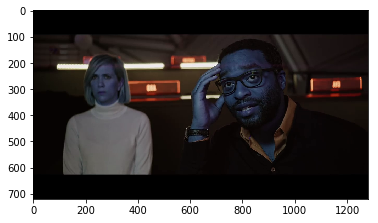

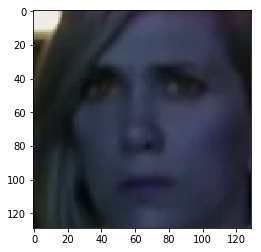

La distanza rispetto all immagine con indice 1171 è: 0.48697488289211527
è stata riconosciuta la faccia di Kristen Wiig


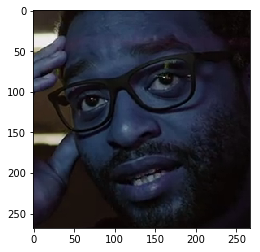

La distanza rispetto all immagine con indice 1036 è: 0.3975160667257964
è stata riconosciuta la faccia di Chiwetel Ejiofor
La distanza rispetto all immagine con indice 1037 è: 0.4473545025985484
è stata riconosciuta la faccia di Chiwetel Ejiofor
La distanza rispetto all immagine con indice 1038 è: 0.4775679323203462
è stata riconosciuta la faccia di Chiwetel Ejiofor


In [23]:
frame_number_for_debug = 2360

input_movie = cv2.VideoCapture(video)
input_movie.set(1, frame_number_for_debug)
ret,frame = input_movie.read()

print("Frame estratto dal video:")
imgplot = plt.imshow(frame)
plt.show()
    
face_locations = face_recognition.face_locations(frame)
face_encodings = face_recognition.face_encodings(frame, face_locations)
    
for face_encoding, (top, right, bottom, left) in zip(face_encodings, face_locations):
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)
        distance = face_recognition.face_distance(known_faces, face_encoding)
        
        crop_img = frame[top:bottom, left:right]
        imgplot = plt.imshow(crop_img)
        plt.show()
        # name = None
        if True in match:
            for value, count in zip(match, range(len(match))):
                if value == True:
                    print("La distanza rispetto all immagine con indice " + str(count) + " è: " + str(distance[count]))
                    name = map[count]
                    print("è stata riconosciuta la faccia di " + name[1])

# Riduzione e trasformazione in json dell'output

In [24]:
c = Counter(face_names)
face_names = [x[0] for x in c.items() if x[1] >= 2]

In [25]:
json.dumps(face_names)

'["Jessica Chastain", "Matt Damon", "Chiwetel Ejiofor", "Kristen Wiig"]'

# Interrogare PredictionIO

In [ ]:
#{ "items": ["tt0133240", "tt0153340"], 
#   "num": 4,
#   "categories" : ["Meg Ryan"]}

L'engine di predictionIO ascolta sulla porta 8000. Per conoscere l'ip dell'engine nella rete bridge create, digitare: <br>
    * $> docker inspect --format '{{ .NetworkSettings.IPAddress }}' <name or id container>

# Esempio di default

In [ ]:
import predictionio
#modificare l'ip del server di PredictionIO (guarda il readme in creazione rete)
engine_client = predictionio.EngineClient(url="http://<IP_Engine>:8000")
print(engine_client.send_query({"items": ["EBJWSum8IYQ", "rmjtP94lUTM"], # film simili a questo. E' l'id del video
                                "num": 10, # quanti film voglio che mi raccomandano
                                "tags" : ["neymar", "football"]})) # filtro sugli attori

# Posso mettere anche vari id. Qui ne ho messi due per avere più risultati. Li mette in or.
# Per quanto riguarda l'id di un video, lo si può prendere da:
# https://www.youtube.com/watch?v=<id_video>, per esempio https://www.youtube.com/watch?v=rmjtP94lUTM

# Esempio con il risultato restituito dal face recognizer

In [ ]:
import predictionio
#modificare l'ip del server di PredictionIO (guarda il readme in creazione rete)
engine_client = predictionio.EngineClient(url="http://<IP_Engine>:8000")
print(engine_client.send_query({"items": [id], # film simili a questo. E' l'id di imdb
                                "num": 4, # quanti film voglio che mi raccomandano
                                "tags" : final_list})) # filtro sugli attori